## Задача 1.
## 1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('C:/GB/Analyst/Python/Homeworks/Homework3/kc-house-data.csv', encoding='1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.shape

(21613, 21)

### 1.1 Изучите стоимости недвижимости.
Постройте график. Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [51]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

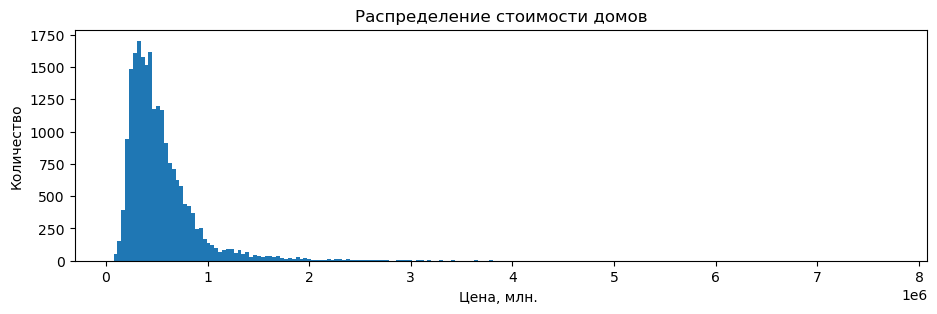

In [52]:
plt.figure(figsize=(11,3))
plt.hist(df['price'], bins=200)
plt.title('Распределение стоимости домов')
plt.xlabel('Цена, млн. ')
plt.ylabel('Количество');

Вывод: Больше всего домов с ценой 350000-500000.

### 1.3 Изучите распределение квадратуры жилой

In [53]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

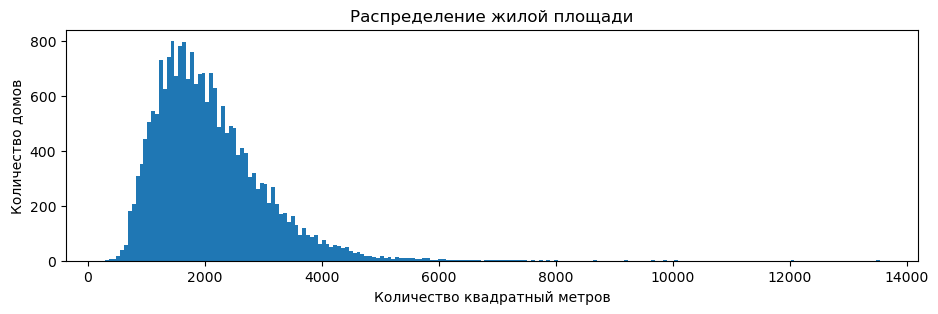

In [54]:
plt.figure(figsize=(11,3))
plt.hist(df['sqft_living'], bins=200)
plt.title('Распределение жилой площади')
plt.xlabel('Количество квадратный метров')
plt.ylabel('Количество домов');

Вывод: Больше всего домов с жилой площадью 1300-1900 м.кв.

### 2.1.4 Изучите распределение года постройки

In [57]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

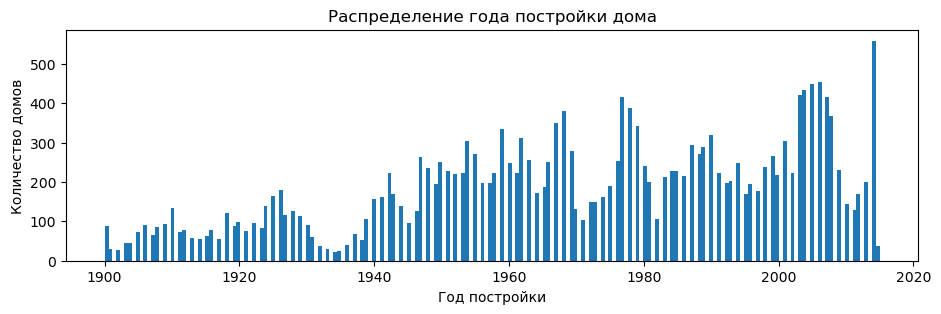

In [58]:
plt.figure(figsize=(11,3))
plt.hist(df['yr_built'], bins=200)
plt.title('Распределение года постройки дома')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Вывод: Больше всего домов построено в 2003-2014 г.

## Условие 2: 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

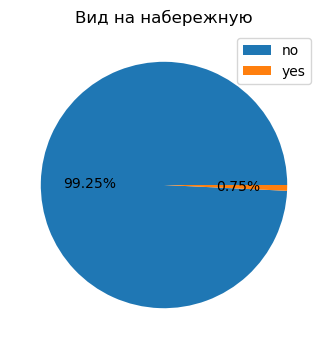

In [80]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.title('Вид на набережную')
plt.pie(data, autopct='%.2f%%')
plt.legend(['no', 'yes']);

Вывод: Домов с видом на набережную меньше 1 %.

### 2.2 Изучите распределение этажей домов

In [81]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

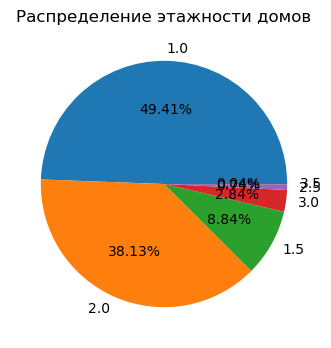

In [85]:
data = df['floors'].value_counts()

plt.figure(figsize=(6, 4))
plt.title('Распределение этажности домов')
plt.pie(data, autopct='%.2f%%', labels=data.index);

Вывод: Чем меньше этажность дома, тем больше таких домов.

### 2.2 Изучите распределение состояния домов

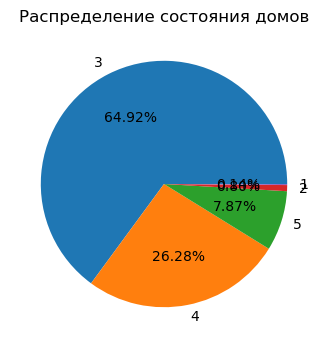

In [86]:
data = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
plt.title('Распределение состояния домов')
plt.pie(data, autopct='%.2f%%', labels=data.index);

Вывод: Больше всего домов с средним состоянием.

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [100]:
corr_matrix = df.corr(numeric_only=True)

In [101]:
corr_matrix = np.round(corr_matrix, 1)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,-0.0,0.0,0.0,-0.0,-0.1,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.1
price,-0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.2,-0.0,0.1,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,-0.0,0.1,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.7,0.7,0.3,0.5,0.1,-0.2,0.0,0.2,0.6,0.1
sqft_living,-0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2
sqft_lot,-0.1,0.1,0.0,0.1,0.2,1.0,-0.0,0.0,0.1,-0.0,0.1,0.2,0.0,0.1,0.0,-0.1,-0.1,0.2,0.1,0.7
floors,0.0,0.3,0.2,0.5,0.4,-0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,-0.1,0.0,0.1,0.3,-0.0
waterfront,-0.0,0.3,-0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1,0.1,0.1,-0.0,0.1,0.0,-0.0,-0.0,0.1,0.0
view,0.0,0.4,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.0,0.3,0.2,0.3,-0.1,0.1,0.1,0.0,-0.1,0.3,0.1
condition,-0.0,0.0,0.0,-0.1,-0.1,-0.0,-0.3,0.0,0.0,1.0,-0.1,-0.2,0.2,-0.4,-0.1,0.0,-0.0,-0.1,-0.1,-0.0


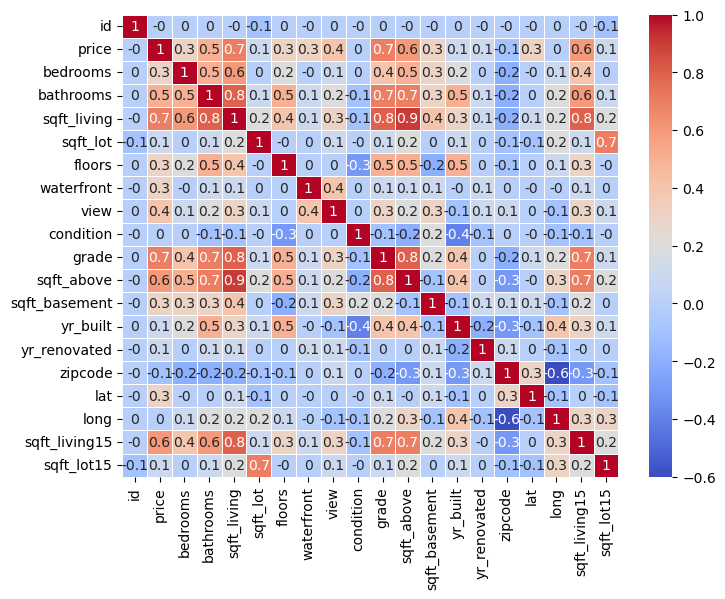

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

По тепловой карте видим, что на стоимость недвижимости больше влияют: 1. общая площадь дома sqft_living (корреляция 0,7), 2. Уровень конструкции и дизайна здания (корреляция 0,7), 3.Количество метров ванных комнат (корреляция 0,5), 4. Вид (корреляция 0,4). 5. Цена дома практически не зависит от уровня состояния дома. Посмотрим эти зависимости повнимательнее.

 ### 1. Влияние sqft_living на стоимость дома

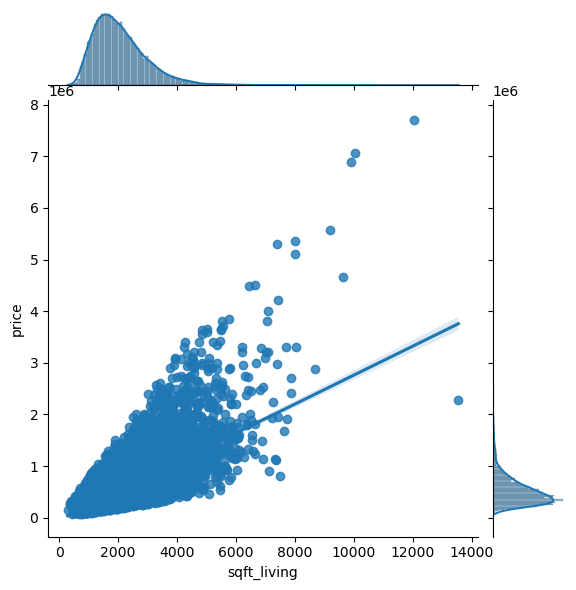

In [118]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Вывод: Чем больше площадь дома, тем больше его стоимость, что и логично. 

### 2. Зависимость стоимости дома от уровня конструкции и дизайна

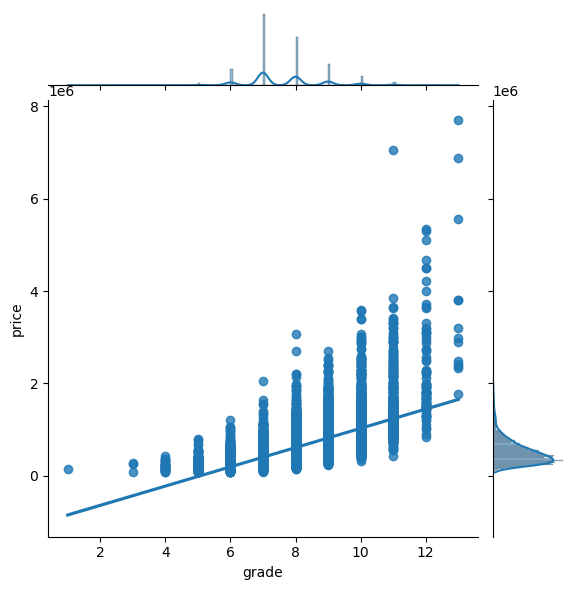

In [125]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

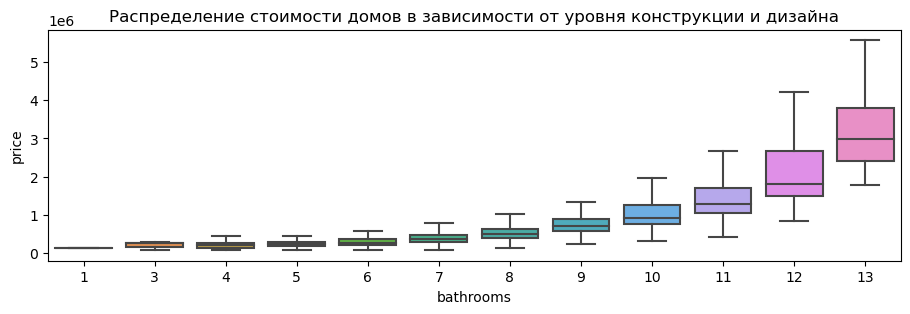

In [158]:
plt.figure(figsize=(11, 3))
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False);
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Распределение стоимости домов в зависимости от уровня конструкции и дизайна');

Вывод: Чем выше уровень конструкций и дизайна дома, тем больше его стоимость и тем больше разброс цен на дома конкретного уровня.

### 3. Зависимость стоимости дома от количества ванных комнат

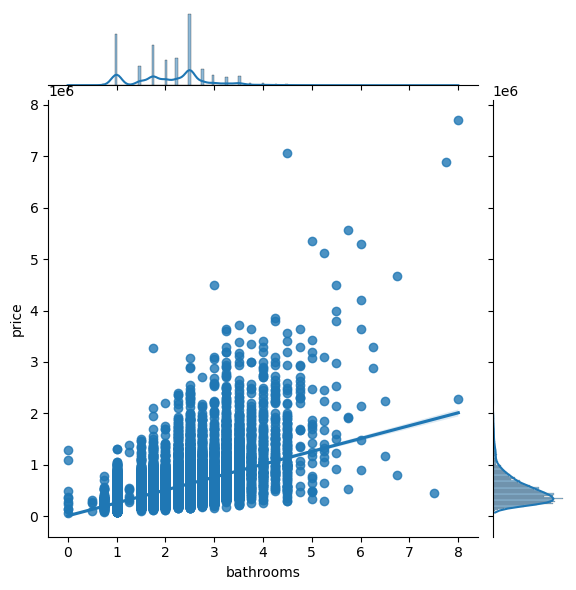

In [124]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg');

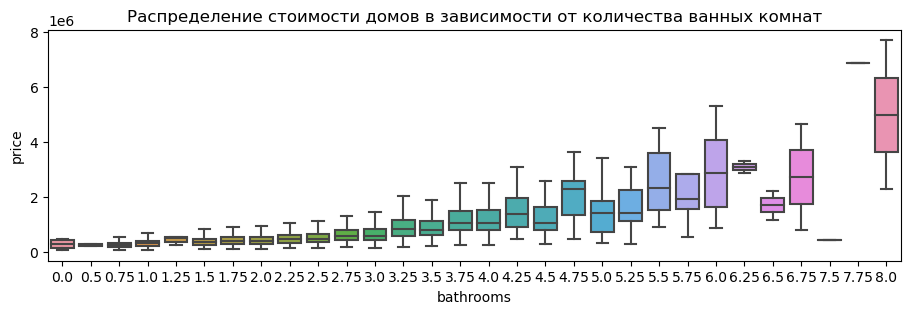

In [157]:
plt.figure(figsize=(11, 3))
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers=False);
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Распределение стоимости домов в зависимости от количества ванных комнат');

Вывод: Чем больше площадь дома, тем большее количество ванных в доме. Максимальный разброс по цене имеют дома с количеством ванных комнат равных 6 и 8, минимальный разброс 1 ванная и меньше (не знаю как это))

### 4. Зависимостьстоимости дома от вида

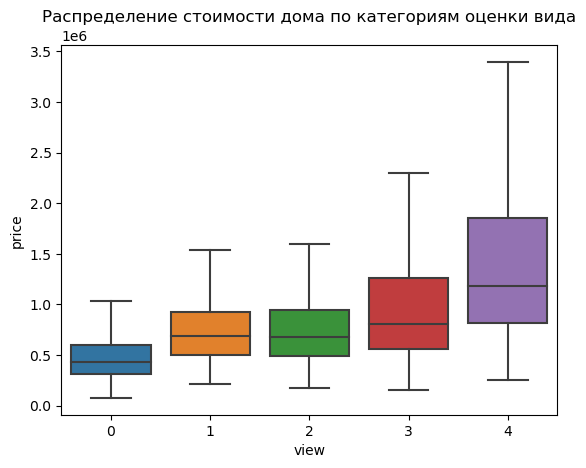

In [160]:
sns.boxplot(x=df['view'], y=df['price'], showfliers=False);
plt.xlabel('view')
plt.ylabel('price')
plt.title('Распределение стоимости дома по категориям оценки вида');

Вывод: Чем выше оценка вида, тем больше стоимость дома, а так же разброс стоимости. Наибольшую стоимость и разброс цен имеют дома с катгорией оценки вида 4.

### 5. Зависимостьстоимости дома от уровня состояния дома

In [148]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

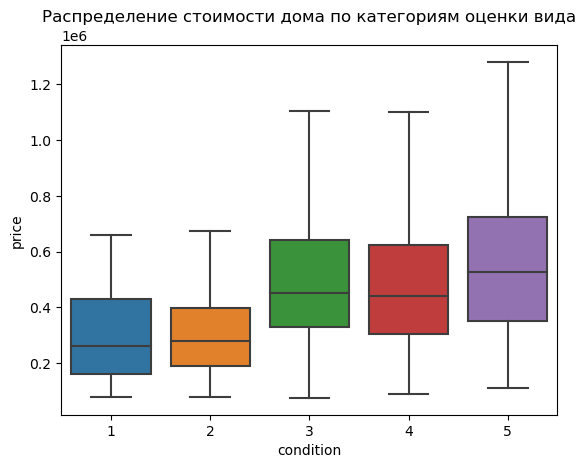

In [162]:
sns.boxplot(x=df['condition'], y=df['price'], showfliers=False);
plt.xlabel('condition')
plt.ylabel('price')
plt.title('Распределение стоимости дома по категориям оценки вида');

Вывод: Стоимость дома очень мало зависит от уровня его состояния.